# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [ ] NO - keep private

# Overview

In [1]:
# TODO

# Names

- Mariam Bachar (A16217374)
- Alexandra Hernandez (A16730685)
- Brian Kwon (A16306826)
- Andrew Uhm (A16729684)
- Ethan Wang (A17229824)

<a id='research_question'></a>
# Research Question

Do certain keywords as identified by CLIP correlate with the popularity (as measured by the equivalent of “likes”) that artwork receives on social media?

<a id='background'></a>

## Background & Prior Work

With the rise of social media in the past decade, Internet users are constantly exposed to different types of media, especially digital art. To interact with them, users can  “like” and “comment” on another’s content, which also notifies the owner of their received feedback. In turn, the algorithm not only encourages users to continue seeing content from the original user, but also similar “liked” content from different users (Lua, 2023). As a result, social media algorithms–despite having the same code throughout–are customized to each user, showing them content that is relevant to them, based on their past interactions with other accounts and users. Furthermore, these processes incorporate machine learning algorithms, such as feature detection and sentiment classification to better pinpoint content and users that an individual will most likely interact with, boosting engagement for both the receiving user–and the social media itself (T.K. et al., 2021).

As social media continues to grow, there continues to be several cases done on the usage of social media algorithms and their role in user engagement. Especially with the introduction of new feature detection technologies–and Artificial Intelligence (AI)–the study field has developed exponentially. In Radion Purba et. al. 's “Instagram Post Popularity Trend Analysis and Prediction” (2020) they looked into social media popularity predictions for marketing purposes; particularly, their research methodology discussed provided a similar workflow to our posed research question. They also discussed definitions of popularity, derived from the data collected. However, the main difference is the study done using hashtags (Radion Purba et al., 2020); we would incorporate AI-generated descriptions of relevant artwork. Similarly, Kafritsas's “CLIP: The Most Influential AI Model from OpenAI and How To Use It” (2022)  details the AI software we plan to use for our data generation. It involves the  AI, CLIP, showcasing  examples of its function, and describes common use cases. CLIP is not necessarily as accurate as other supervised learning models and lacks some context interpreting ability. As we plan to use similar AI technologies in our research, Kafritsas’s usage of CLIP primes us for its use in a concise manner while also precautions us on making certain assumptions when making our analyses.

**References**
1. Lua, A. (2023, April 20). How the Instagram Algorithm Works in 2023: Everything You Need to Know. Buffer Library; Buffer Library. https://buffer.com/library/instagram-feed-algorithm/#how-does-the-instagram-algorithm-work-the-6-key-ranking-factors

2. T.K., B., Annavarapu, C. S. R., & Bablani, A. (2021). Machine learning algorithms for social media analysis: A survey. Computer Science Review, 100395. https://doi.org/10.1016/j.cosrev.2021.100395

3. Radion Purba, K., Asirvatham, D., & Kumar Murugesan, R. (2020). Instagram Post Popularity Trend Analysis and Prediction using Hashtag, Image Assessment, and User History Features. The International Arab Journal of Information Technology, 1. https://doi.org/10.34028/iajit/18/1/10

4. Kafritsas, N. (2022). CLIP: The Most Influential AI Model From OpenAI — And How To Use It. Medium; Towards Data Science. https://towardsdatascience.com/clip-the-most-influential-ai-model-from-openai-and-how-to-use-it-f8ee408958b1

# Hypothesis


We predict that digital artwork that contains certain keywords as predicted by CLIP (painting vs. watercolor vs. digital) will indeed have a positive correlation to popularity on social media. As humans observing what is popular, we notice that certain features tend to repeat themselves across posts, which leads us to believe a correlation will be found.

# Dataset(s)

- Dataset Name: deviation_info
- Link to the dataset: https://github.com/COGS108/Group_Sp23_Project_Group_3/blob/master/deviation_info.csv
- Number of observations: 1188

This dataset is a set of deviations (that is images from deviantart) that contain deviation ids and metadata about the deviation itself as well as the author. It does not include the actual images.

- Dataset Name: caption_info
- Link to the dataset: https://github.com/COGS108/Group_Sp23_Project_Group_3/blob/master/caption_info.csv
- Number of observations: 1188

This dataset is a set of captions processed from the image, corresponding to a deviation id. It was processed using the CLIP interrogator in Automatic1111's stable diffusion webui.

- Dataset Name: images
- Link to the dataset: https://github.com/COGS108/Group_Sp23_Project_Group_3/tree/master/images
- Number of observations: 1198

This dataset is a directory of images in png format that are named based on their corresponding deviation ids, it contains the actual images. There are 10 extra images in here that aren't found in our other datasets.

All of the datasets were built from scraping, and use deviation ids as their identifiers. Because of this, we can easily add them together based on those deviation ids if necessary.

# Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata

import requests
import urllib
from bs4 import BeautifulSoup
import deviantart

import time
from datetime import datetime
from pathlib import Path

import json
from PIL import Image
import base64
import cv2

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

# DeviantArt API: https://www.deviantart.com/developers/http/v1/20210526
# Open-Source Python wrapper for DA API: https://github.com/neighbordog/deviantart

In [3]:
# creates a pd df from the CSV file if it exists, else creates a blank df.
csv_file = 'deviation_info.csv'
try:
    deviation_df = pd.read_csv(csv_file)
except FileNotFoundError:
    deviation_df = pd.DataFrame()

# Data Cleaning

First, we'll do some basic cleaning where we drop N/A values and duplicates.

In [4]:
# if new session, retrieve our deviation info
csv_file = 'deviation_info.csv'
try:
    deviation_df = pd.read_csv(csv_file)
except:
    FileNotFoundError
    
# if new session, retrieve our CLIP caption info
csv_file = 'caption_info.csv'
try:
    caption_df = pd.read_csv(csv_file)
except FileNotFoundError:
    caption_df = pd.DataFrame()

Let's join our dataframes together based on their common ID for easier usage later:

In [5]:
# joining the two dataframes for good measure.
df = pd.merge(deviation_df, caption_df, on='Deviation ID', how='inner')
df.head()

,Deviation ID,Title,Author,Views,Favorites,Comments,URL Link,Date Posted,Height,Width,File Size,Author Watchers,Author Page Views,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,A l'aise...,thrumyeye,2022815,31101,2385,https://www.deviantart.com/thrumyeye/art/A-l-a...,2011-02-17 23:43:04,599,900,408379,36527,1354598,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,Tiger cub,Kamirah,1271452,20720,2097,https://www.deviantart.com/kamirah/art/Tiger-c...,2008-07-11 06:10:53,800,800,523370,45123,7500677,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,Baby Steps 0268P,Sooper-Deviant,1097719,24050,937,https://www.deviantart.com/sooper-deviant/art/...,2009-10-05 06:55:37,400,400,4493241,35586,1438276,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,Sky Turtle,yuumei,1056323,23103,918,https://www.deviantart.com/yuumei/art/Sky-Turt...,2014-01-23 10:46:57,532,1000,390864,397714,22504533,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,Riders,sandara,1240225,15643,512,https://www.deviantart.com/sandara/art/Riders-...,2013-09-30 23:37:02,770,1200,832434,212588,7566524,796,a man riding on the back of a horse next to a ...


We want to anonymize the data to maintain ethical integrity as discussed in our project proposal. Let's remove the Author field, as it doesn't contribute anything otherwise. We don't need the URL anymore and it also reveals the author on top of that, so we remove it too. We are essentially using the caption in place of the title, so we will disregard it. We also acknowledge that webpage "views" can be manipulated by bots. The views on the deviation (read: artwork) are still relevant despite knowing that, but the views on the Author's page matter less so. Let's remove that also:

In [6]:
df = df.drop('URL Link', axis=1)
df = df.drop('Author', axis=1)
df = df.drop('Author Page Views', axis=1)
df = df.drop('Title', axis=1)

In [7]:
df.head()

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,1056323,23103,918,2014-01-23 10:46:57,532,1000,390864,397714,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,1240225,15643,512,2013-09-30 23:37:02,770,1200,832434,212588,796,a man riding on the back of a horse next to a ...


We can justify the rest of the columns. We need the ID for identification purposes. The title may relate to the CLIP caption. The views, favorites, and comments are how we are gauging the popularity of the post. The date posted is relevant for trend analysis. The file size, height, and width implies the rendering definition (e.g. 1080px) of the work. Author watchers and deviations may imply how much experience or traction this author has had on DeviantArt. Finally, the CLIP caption is integral to our hypothesis.

Now we consider adjusting the string-based content of our data. Below we notice that the AI caption is longer than we need it to be:

In [8]:
for n in range(0, 1000, 200):
    print(df['Caption'][n])
    print()

a red fox is sitting in the grass and looking at the camera with a sad look on its face, Arie Smit, animal photography, a stock photo, furry art

a drawing of a bunch of arrows with different designs on them and numbers on them, all of which are different, Évariste Vital Luminais, tarot card, concept art, symbolism

a painting of a winged creature standing in a forest next to a lake with a waterfall in the background, Bastien Lecouffe-Deharme, magic the gathering artwork, concept art, fantasy art

a drawing of a umbrella and a clock on a book page with a pen and ink drawing of a woman holding an umbrella, Farel Dalrymple, illustrated, a storybook illustration, pop surrealism

a drawing of a woman with blue hair and a blue eyeliner on a notebook with a pen and a pen, Android Jones, trending on art station, a watercolor painting, process art



Notice that mainly what is before the first comma is the only relevant part of the caption. Furthermore, the AI makes a guess at who made the picture after the first comma. Let's remove everything after the first comma:

In [9]:
for n in range(df['Caption'].size):
    before_comma = df['Caption'][n].split(",")[0]
    df.loc[n, 'Caption'] = before_comma

In [10]:
df['Caption'][30]

'a forest with a lot of trees and snow on the ground and sun shining through the trees and the ground'

Now the caption is much more precise. However, we do not want the stopwords such as "a", "is", "the", etc. within our analysis, as they are irrelevant. Let's remove them:

In [11]:
stopwords = set(stopwords.words('english'))

In [12]:
for n in range(df['Caption'].size):
    tokens = word_tokenize(df['Caption'][n])
    filtered_text = [word for word in tokens if word not in stopwords]
    if "'s" in filtered_text:
        filtered_text.remove("'s")
    filtered_text = list(set(filtered_text))
    filtered_caption = ' '.join(filtered_text)
    df.loc[n, 'Caption'] = filtered_caption

In [13]:
df['Caption'][30]

'snow forest sun trees shining lot ground'

This will do.

# Data Analysis & Results

The first step of our Data Analysis would be to determine the popularity metric by using views, favorites, and comments fields. This way, we can dive deeper into our analysis and explore 3 main popularity trends: fileSizeAndQuality, authorExperience, and the AICaption.

Next, we will run a statistical test to see whether popularity IS NOT related to fileSizeAndQuality or authorExperience, and if popularity IS related to the AICaption. It's not critical that these statistical tests pass, rather we just need the results to evaluate whether our hypothesis is true or false;

We predict that digital artwork that contains certain keywords as predicted by CLIP (painting vs. watercolor vs. digital) will indeed have a positive correlation to popularity on social media. As humans observing what is popular, we notice that certain features tend to repeat themselves across posts, which leads us to believe a correlation will be found.

We first need to define a popularity metric in order to do meaningful analysis. We explore the views, favorites, comments, and author watcher fields to get an idea of what a reasonable metric to measure popularity would look like.

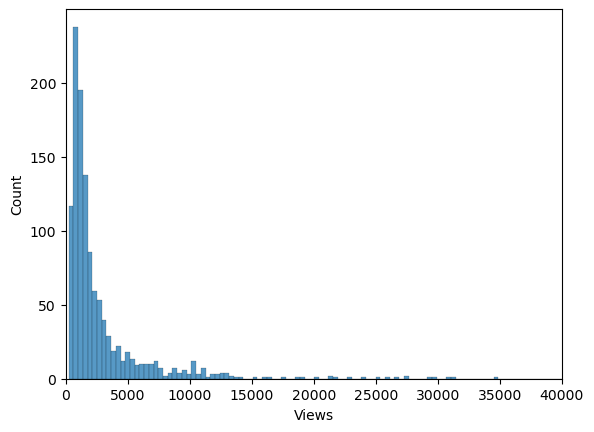

In [14]:
sns.histplot(df['Views']/100)
plt.xlim(0, 40000)
plt.show()

The plot shown above is a histogram of the artwork views divided by 100. The x-axis represents the range of views, while the y-axis represents the frequency or count of artworks falling within each range. The majority of artworks fall between 0 and 5000 views.

In terms of the research question and hypothesis, the histogram provides an overview of the distribution of artwork views on social media. By examining the histogram, we can analyze the relationship between the popularity of artwork (measured by views) and the keywords present in the artwork captions.

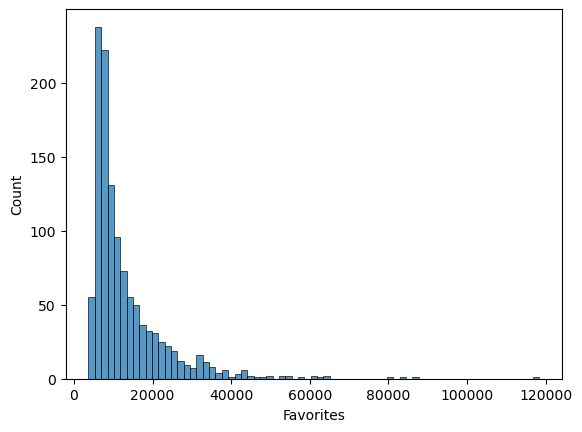

In [15]:
sns.histplot(df['Favorites'])
plt.show()

The plot shown is a histogram of the number of favorites (equivalent to "likes") received by the artworks. The histogram allows us to examine the relationship between the popularity of the artworks (measured by the number of favorites) and the keywords present in their captions. The x-axis represents the range of favorites, while the y-axis represents the frequency or count of artworks falling within each range. As one can see, majority of art received favorites between 5000 to 15000.

By looking at the histogram, we can gain insights into how artworks are being received by the audience in terms of favorites. The distribution of favorites can indicate whether certain artworks are more popular or resonate better with the viewers.

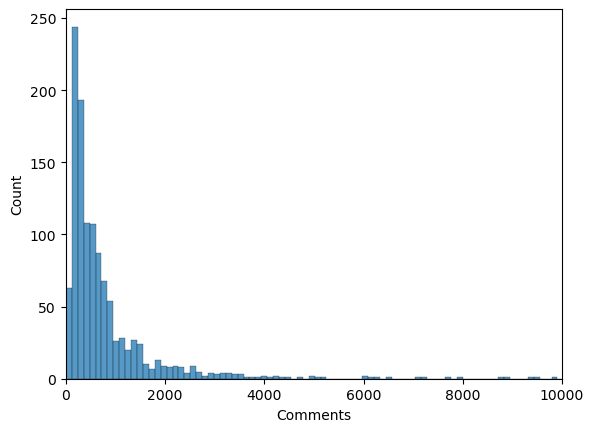

In [16]:
sns.histplot(df['Comments'])
plt.xlim(0, 10000)
plt.show()

The plot shown is a histogram of the number of comments received by the artworks. Similar to the previous plot, the x-axis represents the range of comments, while the y-axis represents the frequency or count of artworks falling within each range, with the majority falling between 0 and 1000 comments.

Analyzing this plot in relation to the research question and hypothesis, it provides an overview of the distribution of comments received by the artworks on social media. The histogram allows us to examine the relationship between the engagement level of the artworks (measured by the number of comments) and the keywords present in their captions.

We notice that the distribution for views, favorites, and comments are all similar but differ obviously on the scale. There are a handful of outliers here and there (two points at around 10 million and 6 million are excluded in the views plot and around 5 points above 10 thousand were excluded in the comments plot), but for the most part most people do not get a lot of interaction on their posts (which is how popularity intuitively works).

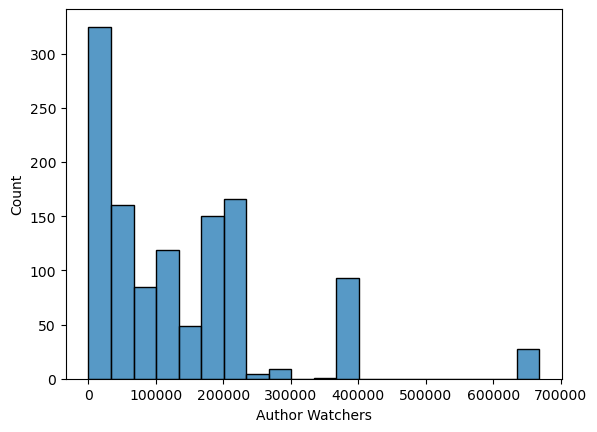

In [17]:
sns.histplot(df['Author Watchers'])
plt.show()

Author distribution is certainly not normal but not necessarily as clearly right-skewed as the popularity metrics.

We note that to put the popularity distributions on a similar scale, we can use the scale factors below:

In [18]:
view_scale_factor = 0.01
favorite_scale_factor = 1.0
comment_scale_factor = 10.0

Finally we can divide by Author Watcher count to normalize popularity based on how large a following an author already has (and thus has contributed to the popularity of the artwork):

In [19]:
popularity_metrics = []
for n in range(df.shape[0]):
    view_count = df['Views'][n]
    favorite_count = df['Favorites'][n]
    comment_count = df['Comments'][n]
    watcher_count = df['Author Watchers'][n]
    popularity_metric = (view_count*view_scale_factor + favorite_count*favorite_scale_factor + comment_count*comment_scale_factor) / watcher_count
    popularity_metrics.append(popularity_metric * 10)

In [20]:
popularity_metric_df = pd.DataFrame(popularity_metrics).rename(columns={0: 'Popularity Metric'})
popularity_metric_df.describe()

,Popularity Metric
count,1188.000000
mean,46.593045
std,340.959089
min,0.134138
25%,0.723449
50%,1.690288
75%,7.912631
max,6759.395455


In [21]:
df = pd.concat([df, popularity_metric_df], axis=1)

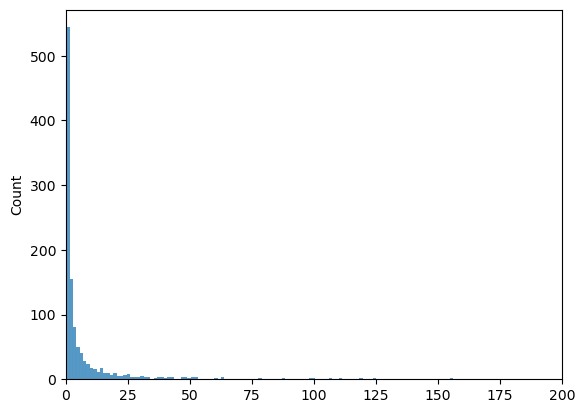

In [22]:
sns.histplot(popularity_metrics)
plt.xlim(0, 200)
plt.show()

Now that we've made a best attempt at normalizing our popularity data, we want to convert it into rank statistics, as popularity data is inherently ordinal in nature if we're sampling starting from the most popular (not to mention we have some pretty wild outliers). We'll use scipy's rankdata and append that to our dataframe:

In [23]:
# flip ranks so we get the highest metric = rank 1
ranks = len(df) + 1 - rankdata(df['Popularity Metric'])
df['Rank'] = ranks

In [24]:
df.head(3)

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption,Popularity Metric,Rank
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,fox red grass look sad camera looking sitting ...,20.581803,166.0
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,top leaves neck forest flowers around tiger si...,12.056938,236.0
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,panda walking red forest tree branch cub,12.476027,232.0


Just as a curiosity, let's order by ranking and see some of the most popular (as defined by us, of course) works:

In [25]:
sorted_df = df.sort_values('Rank').reset_index(drop=True)
sorted_df.head(4)

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption,Popularity Metric,Rank
0,AF3C97E9-AC22-5FC2-200A-9F7DD0DF4E32,165801,26104,1685,2006-11-03 22:12:37,56,99,16277,66,109,picture 's either caption planet pluto quote,6759.395455,1.0
1,60740003-A0C3-5C99-5B55-A7C90A33EB70,2985059,23246,6544,2007-10-14 19:57:15,56,99,4778,202,171,stamp picture different two characters,5868.148020,2.0
2,921BD7C7-0F3E-4102-993C-89EB397F409D,95259,11764,729,2009-01-13 12:31:37,55,99,6993,40,100,picture trouble music background smiley says r...,5001.647500,3.0
3,BB8400B2-75DA-4876-178E-91C0516EBEA0,263967,5051,593,2006-07-13 01:29:25,450,540,178631,46,2,fence background snow lit christmas trees tree...,2961.015217,4.0


picture 's either caption planet pluto quote


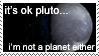

In [26]:
# deviation with the highest popularity metric
most_popular_id = sorted_df.loc[0][0]
most_popular_index = sorted_df[sorted_df['Deviation ID'] == f'{most_popular_id}'].index[0]
print(sorted_df[sorted_df['Deviation ID'] == f'{most_popular_id}'].loc[most_popular_index][10])
display(Image(filename=f'./images/{most_popular_id}.png', width=300))

fence background snow lit christmas trees tree covered night


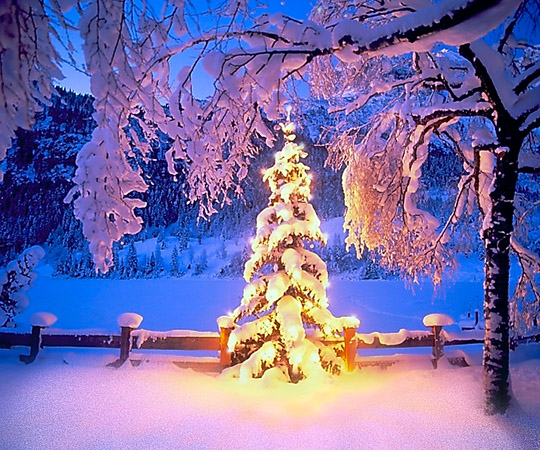

In [27]:
# deviation with the fourth highest popularity metric
# ...choosing the fourth since second and third place are both also "stamp" memes like the most popular
second_most_popular_id = sorted_df.loc[3][0]
second_most_popular_index = sorted_df[sorted_df['Deviation ID'] == f'{second_most_popular_id}'].index[0]
print(sorted_df[sorted_df['Deviation ID'] == f'{second_most_popular_id}'].loc[second_most_popular_index][10])
display(Image(filename=f'./images/{second_most_popular_id}.png', width=400))

In order to observe the data and to see the effects of keywords on popularity, we decided to aggregate all of the popularity data into a single dataframe with only the popularity values paired with keywords. In order to determine the popularity of a keyword, we decided to take the average of the popularities of each keyword and use that value to determine the overall popularity. We also removed all words that appeared less than 3 times in order to remove some inconsistent words that had high popularity rankings that appeared very few times. In order to do this, we used the values from the dictionary unique to create the new dataframe. We also did a log on the data in order to further deal with outliers.

First let's store the keywords and popularity statistics into one dictionary:

In [28]:
# unique is a dict that contains a list of tuples of (Deviation ID, Popularity Metric, Rank) for each unique word in our df.
# the frequency of a key (word) is the length.
unique = {}
for n in range(df.shape[0]):
    tokens = word_tokenize(df['Caption'][n])
    for word in tokens:
        if word in unique:
            unique[word].append((df['Deviation ID'][n], df['Popularity Metric'][n], df['Rank'][n]))
        else:
            # tuple that contains (freq, deviation ID)
            unique[word] = [(df['Deviation ID'][n], df['Popularity Metric'][n], df['Rank'][n])]

In [29]:
# for example:
unique['branch']

[('8F1ED8A1-88A5-861A-F83B-77916A1481A0', 12.476027089304784, 232.0),
 ('A77528CF-7D8B-734F-09FF-A20F273E1F1F', 7.015633847961964, 317.0),
 ('7FCBF6C1-783A-4AE4-8322-9991CD34253A', 5.820496637351268, 351.0),
 ('7E879736-6DBA-5262-6935-8D22F87D8AED', 1.0930396852849613, 726.0),
 ('5C1F6B9A-2224-E9B4-D7BA-4DB93FE0FEDD', 1.5863297221131412, 620.0),
 ('6F78458E-4DCA-C156-2566-AE328D9EB766', 3.9502426515777653, 421.0),
 ('0086BEF0-C182-912F-7CB2-1D743B720A99', 11.729583395254373, 241.0),
 ('FFC323F3-B917-3DC2-77BB-5242E98BE18D', 3.615618583513566, 439.0),
 ('CC7A161D-CF1F-B0C9-8D29-D963389B209C', 1.3735208245391868, 670.0),
 ('75993019-BCDB-7871-83D2-F041ABC813CD', 0.26823879417680296, 1175.0),
 ('5E0C9B16-41D4-3108-8F1D-127FFBCECE06', 4.111395013393777, 415.0),
 ('AA879A6F-958B-28D4-3DDA-FB1180CDA983', 0.9120141224503455, 807.0),
 ('46FE4F99-5800-E659-DC5A-42004B32C686', 0.454380814439307, 1084.0),
 ('CC01191D-DAB5-C75D-1654-CF4CA0E1DA83', 1.8236498116016189, 576.0),
 ('386964D4-B1EA-BE42-

Let's further apply a Term Frequency - Inverse Document Frequency (TFIDF) vectorizer on top of this data to better scale keywords to their uniqueness within our database:

In [30]:
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        analyzer='word', 
                        tokenizer=word_tokenize, 
                        stop_words=list(stopwords))

In [31]:
vectorized_tokens = tfidf.fit_transform(df['Caption'])
vectorized_tokens = pd.DataFrame(vectorized_tokens.toarray(),
                                 columns=tfidf.get_feature_names_out())
vectorized_tokens['Deviation ID'] = df['Deviation ID']
vectorized_tokens = vectorized_tokens.set_index('Deviation ID')

words = []
pop_val = []
sums = 0.0
for word in unique:
    if(len(unique[word]) > 2):
        sums = 0.0
        words.append(word)
        for values in unique[word]:
            sums += values[1] * vectorized_tokens.loc[values[0],word]
        pop_val.append(sums/len(unique[word]))
keyword_pop = pd.DataFrame(list(zip(words, pop_val)))
keyword_pop.columns = ['keyword', 'popularity']
keyword_pop = keyword_pop.sort_values('popularity').reset_index(drop=True)

sorted_keyword_pop = keyword_pop.sort_values('popularity', ascending=False)
sorted_keyword_pop.head(40)

,keyword,popularity
480,quote,869.980506
479,smiley,593.411431
478,sleeping,352.326720
477,planet,258.671443
476,'s,251.117647
475,weird,194.716473
474,microphone,192.109907
473,door,188.408499
472,covered,187.608306
471,fence,184.136424


In [32]:
words = []
pop_val = []
sums = 0.0
for word in unique:
    words.append(word)
    for values in unique[word]:
        sums += values[1]
    # add only if appears more than 3 times
    if (len(unique[word]) > 2):
        pop_val.append(sums/(len(unique[word])))
    sums = 0.0
keyword_pop = pd.DataFrame(list(zip(words, pop_val)))
keyword_pop.columns = ['keyword', 'popularity']
keyword_pop = keyword_pop.sort_values('popularity').reset_index(drop=True)
keyword_pop.loc[keyword_pop['keyword'] == 'branch']

,keyword,popularity
196,branch,7.769796


We finally do a normalization involving logarithmic scaling and graph our findings:

,keyword,popularity,logval
0,knife,0.568332,-0.565050
1,roof,0.605296,-0.502038
2,trail,0.611426,-0.491961
3,time,0.631511,-0.459640
4,owls,0.666431,-0.405818
...,...,...,...
476,table,684.624802,6.528871
477,cut,708.691812,6.563421
478,hands,738.249894,6.604282
479,smile,1688.652855,7.431686


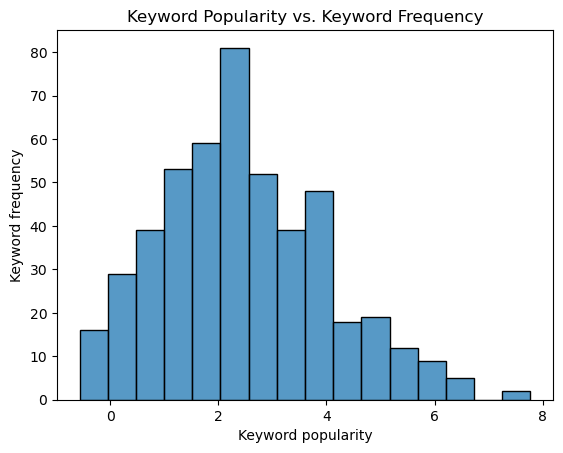

In [33]:
log_series = np.log(keyword_pop.popularity)
popularity_graph = sns.histplot(log_series)

# setting titles for clarification
popularity_graph.set_title('Keyword Popularity vs. Keyword Frequency')
popularity_graph.set_xlabel('Keyword popularity')
popularity_graph.set_ylabel('Keyword frequency')

keyword_pop['logval'] = log_series
keyword_pop

From this graph, the most "popular" keywords (such as "arms") appear the **LEAST** in frequency, whereas lower to middle end popular keywords are more frequent in DeviantArt posts. Overall, the graph of popular keywords and their frequency is normally distributed. 

It should be noted that the aggregation of keyword frequency is made up of multiple keywords with similar popularity ratings, giving the rise of either low, middle, or high frequency. Furthermore, the most popular keywords show up in the least amount of DeviantArt posts, so we can see that keywords may possibly *not* drive a post's popularity overall.

## Machine Learning
With that said, let's see if with a machine learning model whether a predictive model can be generated or not:

In [34]:
# TODO: transfer Ethan's findings

# Ethics & Privacy

There are a number of ethical concerns regarding this research question that we must be mindful of as we analyze data. The most obvious issue is that we are tagging artwork as unpopular by virtue of not identifying said artwork as popular. However, this should not be a strong issue as we are not presenting identifying pieces of information of specific pieces of artwork or individual artists, so it should not be possible to label a specific artwork or artist as “unpopular”.

In terms of normalization, a possible solution would be to take a ratio between the number of likes on the artwork and the number of followers that certain artist has in order to take into account the disparity between larger artists and smaller artists in terms of popularity, as more popular artists would get more likes due to a larger audience. Additionally, it is entirely possible that our analysis may exclude cultural influences of minority groups. Since those residing in developed countries have more leisure time/resources (such as drawing software or drawing e-tablets), it is plausible that most digital art posted to social media is likely from developed countries. Thus, the work we analyze may disproportionately represent artwork and cultural trends of majority groups of developed countries while glossing over minority groups, which tend to be similar across developed countries.

Finally, because the artworks are on a public forum, they have consented to allowing their art to be analyzed. The Deviantart TOS states that you cannot “reproduce, distribute, publicly display or perform, or prepare derivative works”, which does not include the use of the artworks for an analytic survey. Although there is no clear-cut solution for this, it serves us well to keep this fact in mind when drawing conclusions upon our analyses.

# Conclusion & Discussion

In [35]:
# TODO

# Team Contributions

In [36]:
# TODO